# Aim
Checking if centroids of overlapping optima of local subgraphs also maximize their parent graphs

## Basics

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
sys.path.append('home/egupta/.local/bin')

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import scipy.stats as ss
import networkx as nx
import csv 
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib
from matplotlib import pyplot as plt
#clustering
import pandas as pd
from sklearn.cluster import KMeans

%matplotlib inline


##qtensor imports
import qtensor
from qtensor import QAOA_energy
from qtensor import parameter_optimization as popt

2021-07-16 11:03:04,918- WARNING•	QuickBB solver is unavailable
2021-07-16 11:03:04,925- WARNING•	Tamaki solver is unavailable: No path /home/egupta/.local/lib/python3.7/site-packages/thirdparty/tamaki_treewidth


In [3]:
import torch

# Subgraphs Code

In [27]:
## My Code
def get_qaoa_params(graph, edge=None, gamma=[0.5], beta=[0.5], steps=50):
    loss_history, params_history = popt.qaoa_maxcut_torch(graph, gamma, beta,
                                                          ordering_algo='greedy',
                                                          Opt=torch.optim.RMSprop,
                                                          edge=edge,
                                                          opt_kwargs=dict(lr=0.002),
                                                          steps=steps,
                                                          pbar=False)
    best_ix = np.argmin(loss_history)
    return params_history[best_ix], loss_history[best_ix]

In [11]:
import pandas as pd
from sklearn.cluster import KMeans

# Importing random graphs

In [12]:
g_data = []
with open('20NodeRandomData1.csv', 'r', newline = '') as s:
    spamreader = csv.reader(s, quotechar='|')
    for row in spamreader:
        new_row = [float(i) for i in row]
        g_data.append(new_row)

In [13]:
resi = []
with open('20NodeRandomGraph1.csv', 'r', newline = '') as g:
  spamreader = csv.reader(g, quotechar='|')
  for row in spamreader:
    resi.append(row)

#convert bunch of rows to matrices
n = int(len(resi)/20)
mat_list = []
for i in range(n):
  array = []
  for j in range(20):
    row = resi[i*20 +j]
    row = [float(k) for k in row]
    array.append(row)
  mat_list.append(array)

In [14]:
def mats_to_graphs(mat_list):
  """
  Given list of adjaceny matrix repr of graphs, converts to actual graphs
  """
  g_list = []
  for mat in mat_list:
    arr = np.array(mat)
    G = nx.convert_matrix.from_numpy_matrix(arr)
    g_list.append(G)
  return g_list

In [15]:
g_list = mats_to_graphs(mat_list)

In [16]:
len(g_data)

55

In [17]:
len(g_list)

55

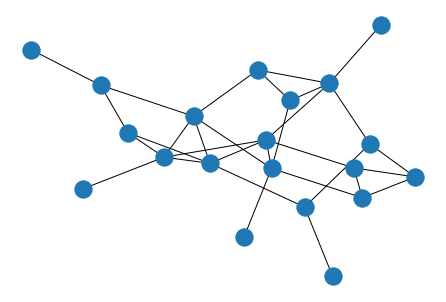

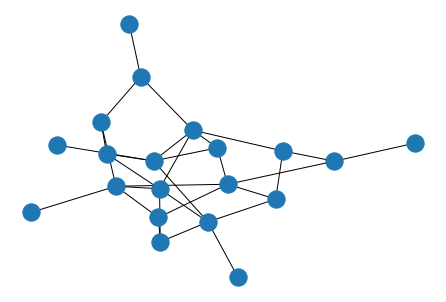

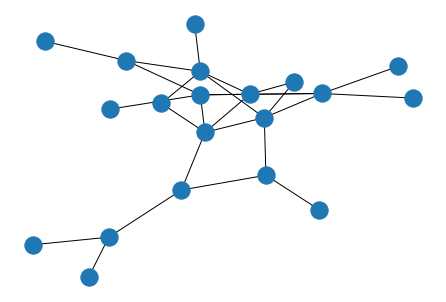

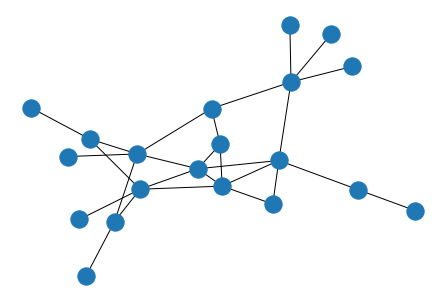

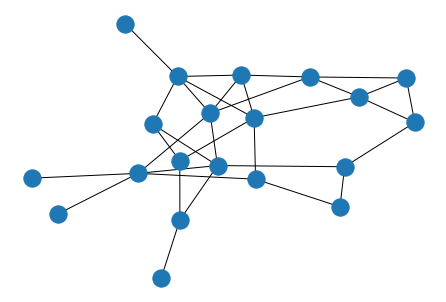

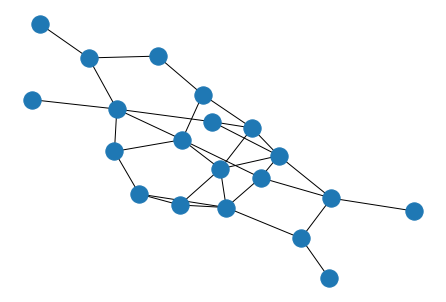

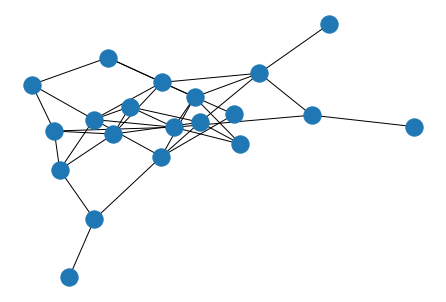

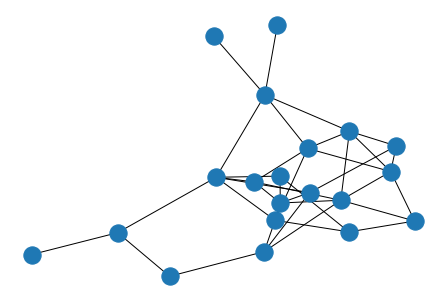

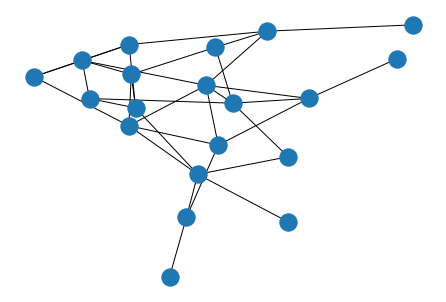

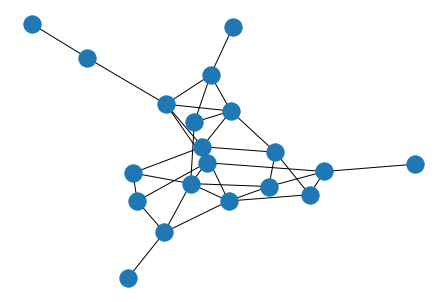

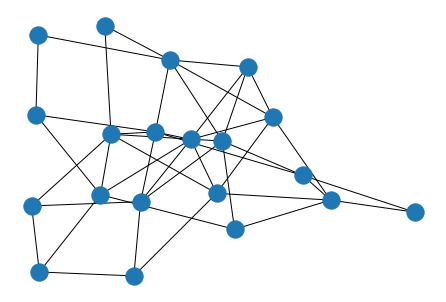

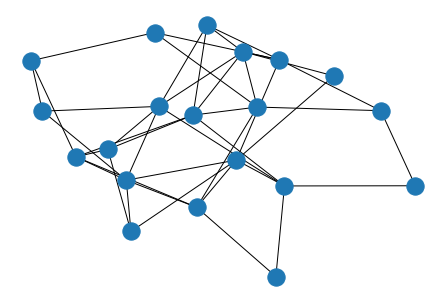

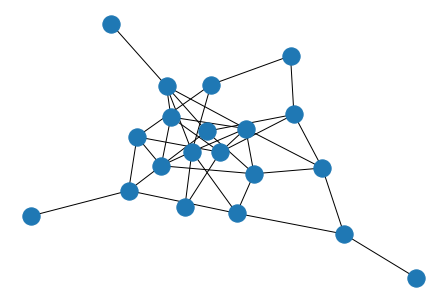

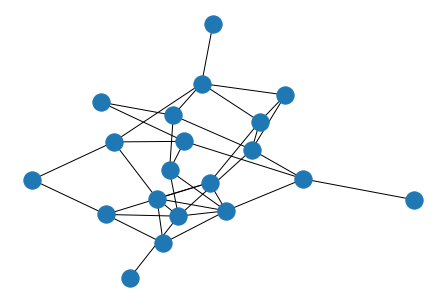

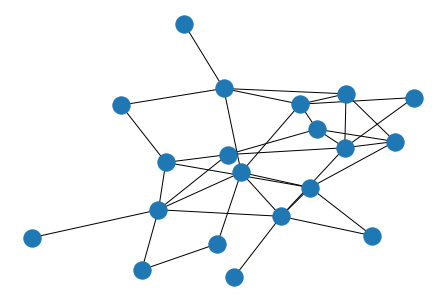

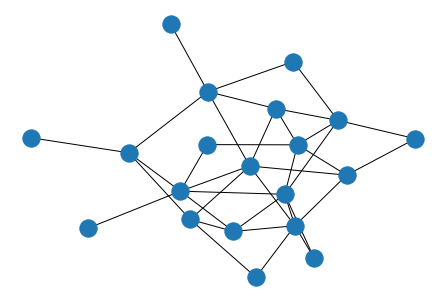

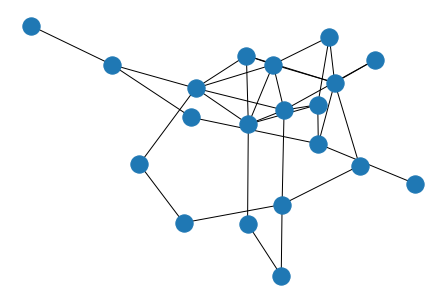

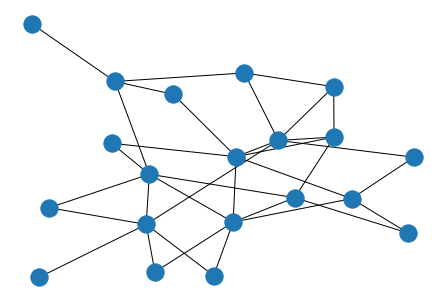

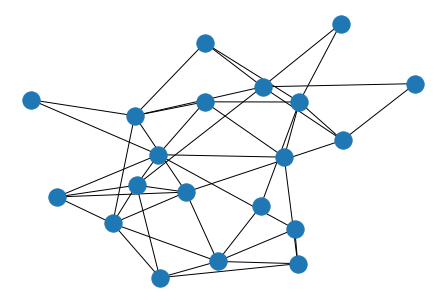

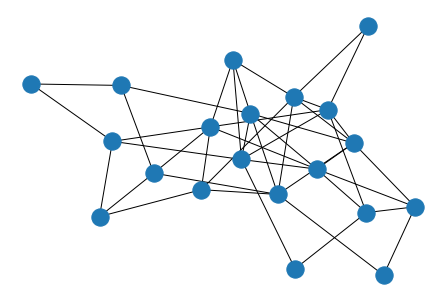

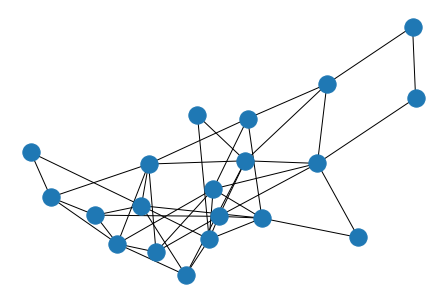

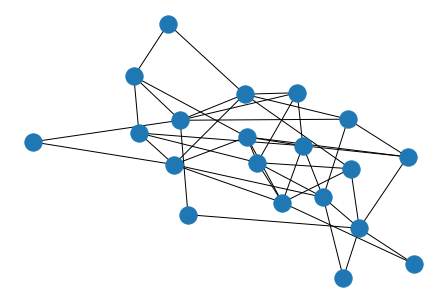

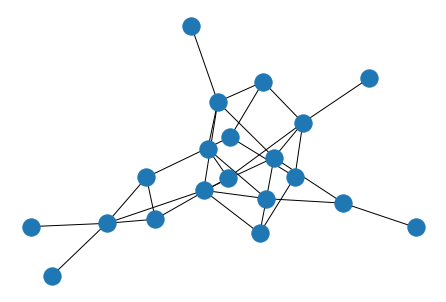

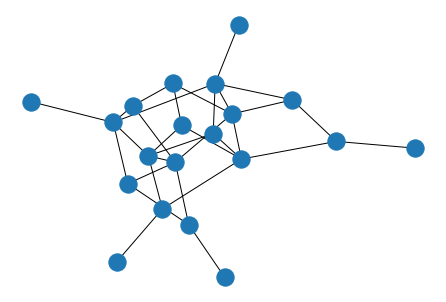

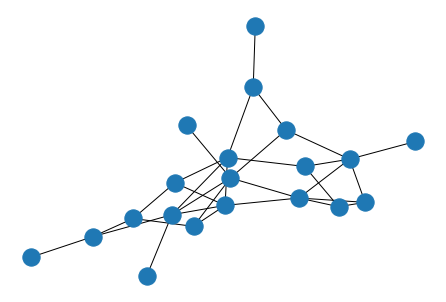

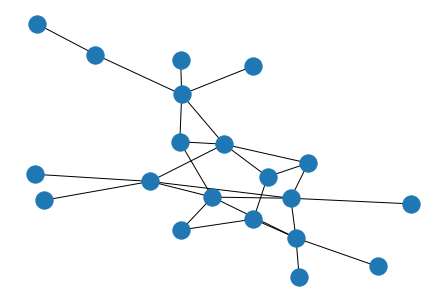

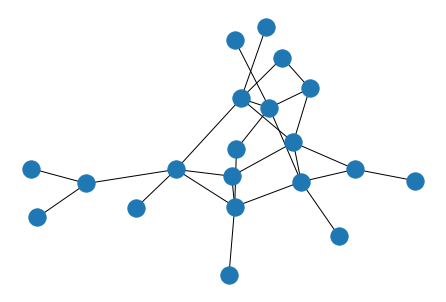

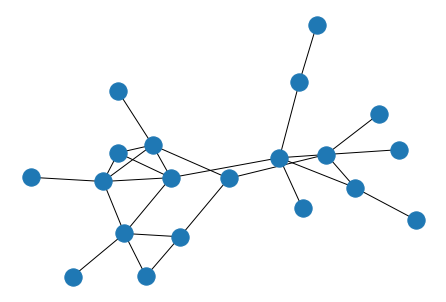

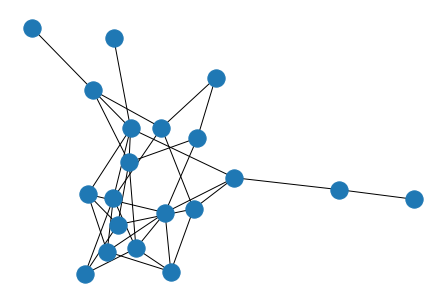

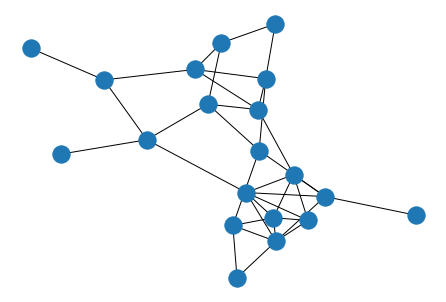

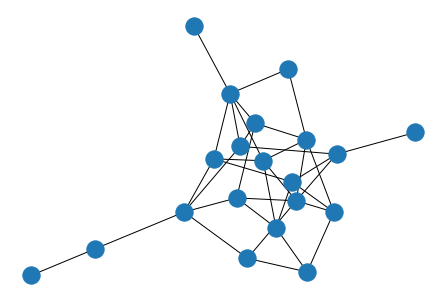

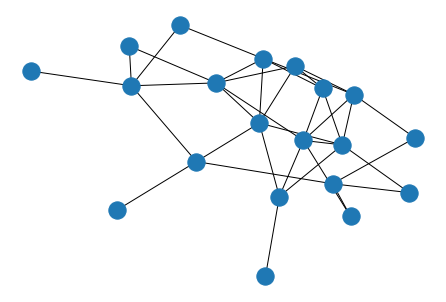

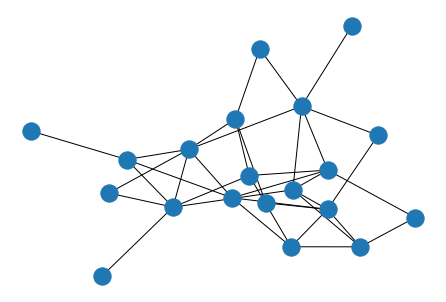

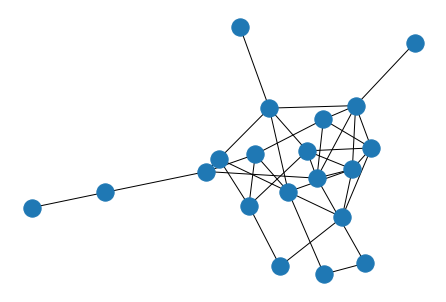

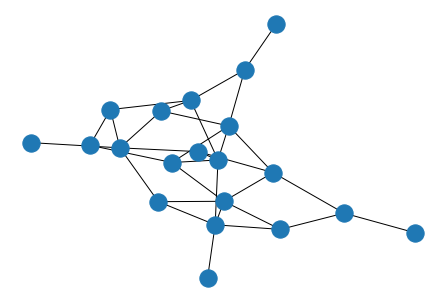

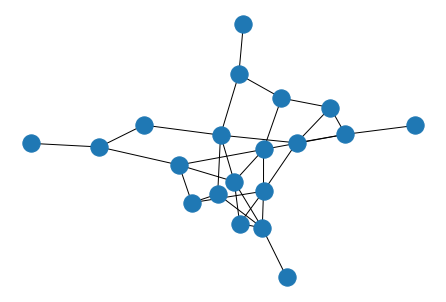

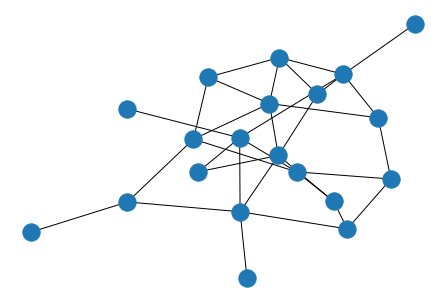

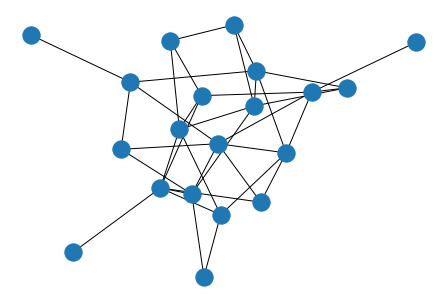

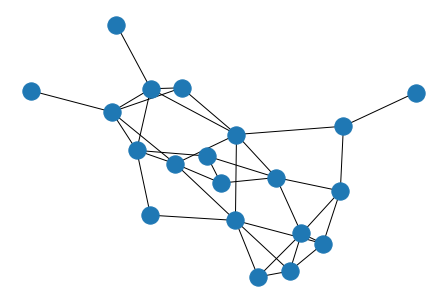

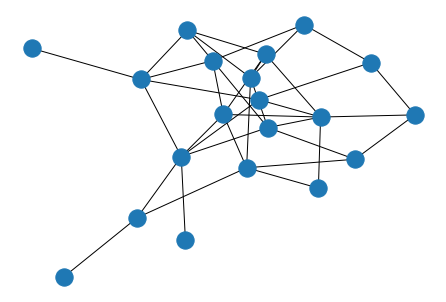

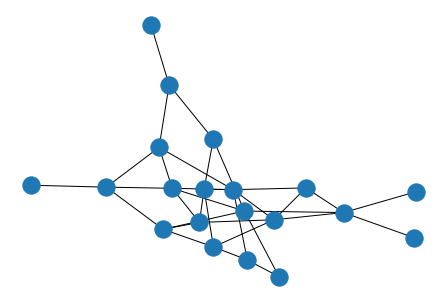

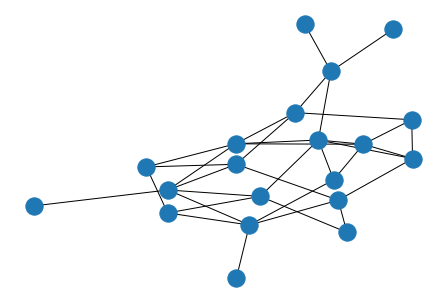

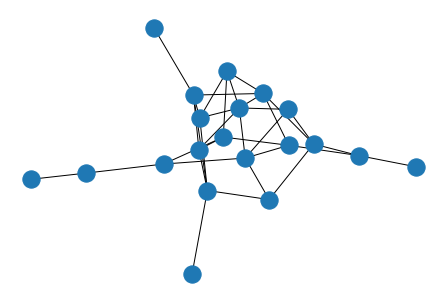

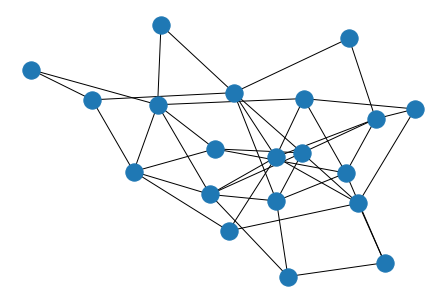

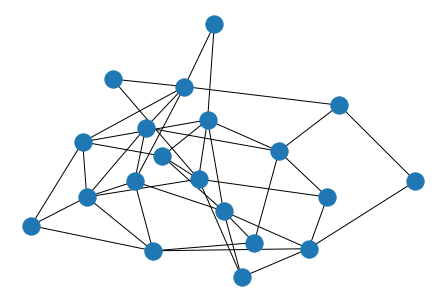

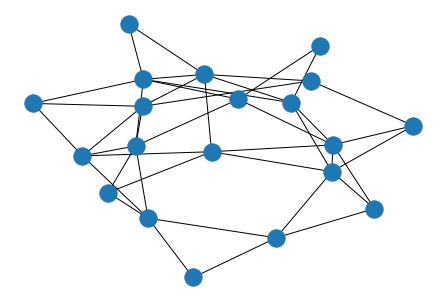

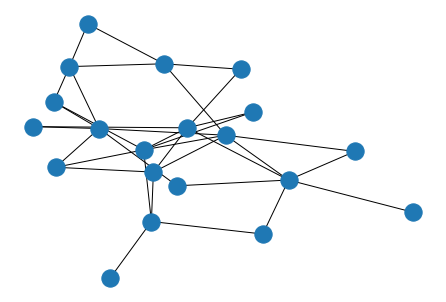

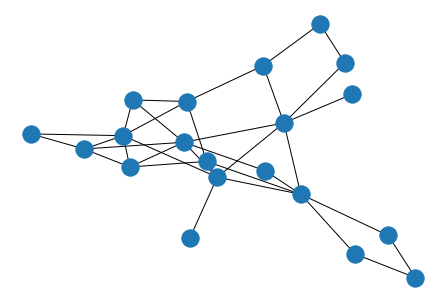

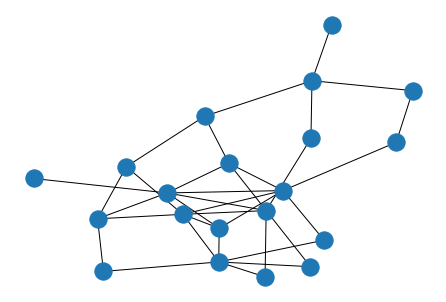

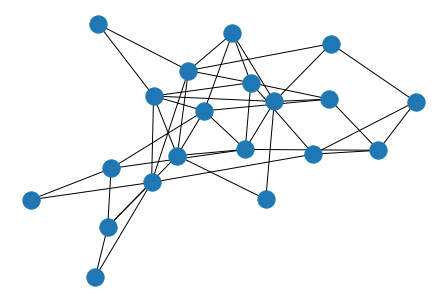

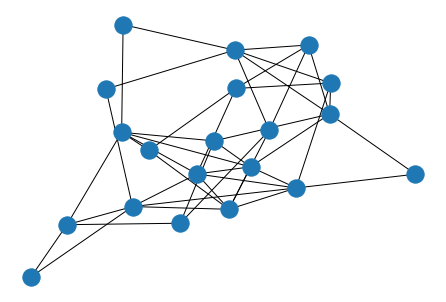

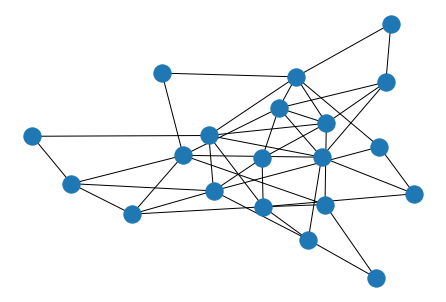

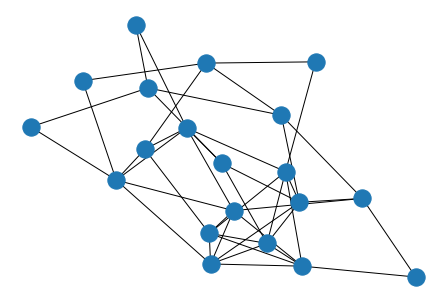

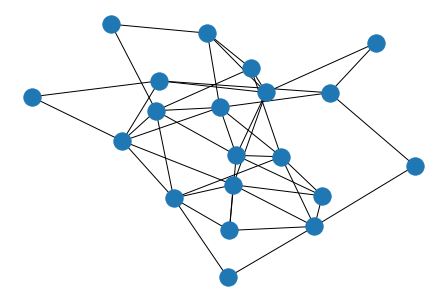

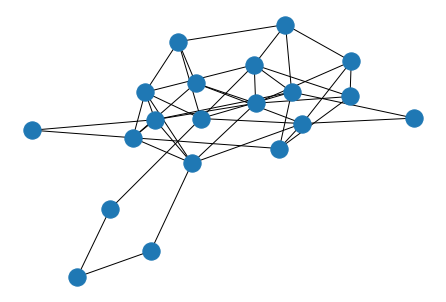

In [18]:
for i in g_list:
  nx.draw(i)
  plt.show()

# Find Local Optima of Graphs

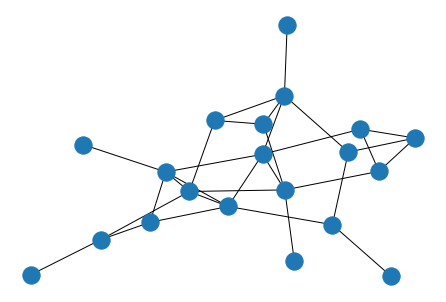

In [25]:
graph = g_list[0]
nx.draw(graph)
plt.show()


In [ ]:
n = 5
results = []
for g in range(len(g_list[:22])):
    graph = g_list[g]
    g_results = []
    for i in range(n):
        print(i)
        p=1
        gamma = [np.random.rand() for i in range(p)]
        beta = [np.random.rand() for i in range(p)]
        params, loss = get_qaoa_params(graph, gamma = gamma, beta = beta, steps=200)
        en = -1*loss
        print(en)
        g_results.append([float(params[0]), float(params[1]), float(en)])
    results.append(g_results)

0
20.28474998474121
1
20.284751892089844
2
20.284748077392578
3
20.284751892089844
4
20.284751892089844
0
20.502639770507812
1
20.502639770507812
2
20.50263786315918
3
20.50263786315918
4
20.50263786315918
0
tw 2
tw 2
tw 2
tw 2
tw 2
tw 2
tw 2
tw 2
tw 2
tw 2
tw 2
tw 2
tw 2
tw 2
tw 2
tw 2
tw 2
tw 2
tw 2
tw 2
tw 4
tw 3
tw 3
tw 2
tw 3
tw 3
tw 2
18.06639862060547
1
18.06639862060547
2
17.1562442779541
3
18.0664005279541
4
17.15624237060547
0
17.114864349365234
1
17.860027313232422
2
17.860027313232422
3
17.11469268798828
4
17.860027313232422
0
tw 3
tw 4
tw 3
tw 2
tw 3
tw 4
tw 4
tw 3
tw 2
tw 2
tw 3
tw 3
tw 2
tw 2
tw 3
tw 2
tw 3
tw 2
tw 2
tw 2
tw 2
tw 2
tw 3
tw 2
tw 3
tw 3
tw 2
tw 3
tw 2
tw 2
tw 2
tw 2
19.15484619140625
1


In [39]:
results

[[0.6591702103614807, 0.7232640981674194, 15.94125747680664]]

In [40]:
g_data[0]

[0.9126172661781311, 1.117039442062378, 20.284748996816113, nan]

In [37]:
def even_deg(graph):
    """
    Returns what percentage of nodes have even degree
    """
    n = graph.number_of_nodes()
    e = 0
    for i in range(n):
        if graph.degree[i] %2 ==0:
            e+=1
    return e/n

In [51]:
acceptors_idx = [1+2*i for i in range(11)]
acceptors = [g_list[i] for i in acceptors_idx]
even_deg_p = [even_deg(acceptor) for acceptor in acceptors]
ratios = []
ratios_r = []

for a_idx in acceptors_idx:
    acceptor = g_list[a_idx]
    a = 0
    ratios_r_ = []
    for i in range(n):
        print(i)
        donor_gamma = results[i][0]
        donor_beta = results[i][1]
        acc_max_en = float(g_data[a_idx][2])    
        transf_energy = float(QAOA_energy(acceptor, [donor_gamma], [donor_beta]))
        a+= transf_energy/acc_max_en
        r = transf_energy/acc_max_en
        ratios_r_.append(r)
    print(a)
    ratios_r.append(ratios_r_)
    ratios.append(a/n)

0



1



2



3



4



4.998303122914236
0



1



2



3



4



4.831196426357972
0



1



2



3



4



4.6117502425402845
0



1



2



3



4



4.4048157396078755
0



1



2



3



4



4.1890033809695995
0



1



2



3



4



4.163895233753656
0



1



2



3



4



3.807886074101275
0



1



2



3



4



3.6147255466820725
0



1



2



3



4



3.3685517047289997
0



1



2



3



4



3.3250563513703018
0



1



2



3



4



3.1929571709846845


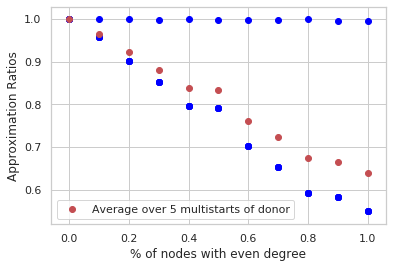

In [62]:
plt.plot(even_deg_p, ratios, "ro", label = "Average over 5 multistarts of donor")
for i in range(len(even_deg_p)):
    for j in range(n):
        plt.scatter(even_deg_p[i], ratios_r[i][j], color = "blue")
plt.xlabel("% of nodes with even degree")
plt.ylabel("Approximation Ratios")
plt.legend()
plt.show()

In [59]:
dicty= {}
for i in range(len(even_deg_p)):
    dicty[even_deg_p[i]] = ratios_r[i]

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
df = pd.DataFrame(dicty)

ax = sns.boxplot(x="percent of even degree nodes", y="approximation ratio", data=df, showfliers = False)
# ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

plt.show()

ValueError: Could not interpret input 'percent of even degree nodes'

In [23]:
def find_index(sub, subgraphs):
    """
    finds index of subgraph sub is isomorphic with
    """
    i = 0
    while i<len(subgraphs):
        if nx.is_isomorphic(sub, subgraphs[i]):
            return i
        i+=1
    print('error: could not find subgraph')
    return -1

In [24]:
def find_subgraphs(G):
  '''
  Input: A graph G
  Output: A dictionary containg subgraphs and their frequency in G
  '''
  edges_done = []
  subgraphs = {}

  vertices = G.nodes
  for v1 in vertices:
    ######print('----------------------------------------')
    ######print('Parent checking for vertex ' +str(v1) )
    neighbors = nx.all_neighbors(G,v1)
    ######print(neighbors)
    #iterate over edges
    for v2 in neighbors:
      ######print('Childchecking for vertex ' +str(v2) )
      ##if already there
      if (v1,v2) in edges_done:
        #######print('Already looked at')
        continue
      ##add if not there
      else:
        ######print('Not looked at')
        edges_done.append((v1,v2))
        edges_done.append((v2,v1))
      
      neighbors1 = nx.all_neighbors(G,v1)
      neighbors2 = nx.all_neighbors(G, v2)

      subg_edge_set = []
      for v in neighbors1:
        #######print(v)
        edge = (v1, v)
        subg_edge_set.append(edge)

      for v in neighbors2:
        ######print(v)
        if v is not v1:
          edge = (v2, v)
          subg_edge_set.append(edge)

      ##creating the subgraph
      H = G.edge_subgraph(subg_edge_set)

      ##check if isomorphic with any other subgraphs
      iso = False
      subgraphs_arr = subgraphs.keys()
      for subgraph in subgraphs_arr:
        if nx.is_isomorphic(H, subgraph):
          #######print('is isomorphic')
          subgraphs[subgraph] +=1
          iso = True
          break
      if iso == False:
        #######print('---------------Adding a subgraph--------------------')
        subgraphs[H] = 1
        ######print(subgraphs)
  return subgraphs

In [26]:
master = find_subgraphs(g_list[0])
master

{<networkx.classes.graph.Graph at 0x7fa1e5d3cc10>: 7,
 <networkx.classes.graph.Graph at 0x7fa1e5ed1490>: 3,
 <networkx.classes.graph.Graph at 0x7fa1e5ed19d0>: 4,
 <networkx.classes.graph.Graph at 0x7fa1e5dbc150>: 4,
 <networkx.classes.graph.Graph at 0x7fa1e5dbcd10>: 4,
 <networkx.classes.graph.Graph at 0x7fa1e5e377d0>: 2,
 <networkx.classes.graph.Graph at 0x7fa1e5e37ed0>: 3,
 <networkx.classes.graph.Graph at 0x7fa1e5dbc8d0>: 3,
 <networkx.classes.graph.Graph at 0x7fa1e5dbcb90>: 1}

In [28]:
unw_centers =[]
w_centers = []
for sub in master.keys():
    idx = find_index(sub, g_all)
    freq = master[sub]
    
    for i in range(4):
        center = centers[idx*4 + i]
        unw_centers.append(center)
        for i in range(freq):
            w_centers.append(center)

[[0.12499876464542051, 0.5850895917304602],
 [0.37500845874783495, 0.0851140413131729],
 [0.1249916358924617, 0.9148781093111022],
 [0.3749586469406443, 0.41490970054596504],
 [0.3750334572790459, 0.4261845747250619],
 [0.1249473406347334, 0.9262089143333652],
 [0.12504083534767324, 0.5737801185315671],
 [0.3748944239756322, 0.07378479495839219],
 [0.3887809993984139, 0.4293269962931411],
 [0.11117654444823064, 0.9292844132072133],
 [0.38870075850050934, 0.07066566460495421],
 [0.11115042937932512, 0.5706577524014392],
 [0.10468317569277924, 0.5872913442844897],
 [0.3952611654110557, 0.41267571747800236],
 [0.10471905506731133, 0.912680983085546],
 [0.39535971761399513, 0.08736320871261549],
 [0.1085975168492133, 0.9200435722252298],
 [0.391336470559872, 0.42000779243536634],
 [0.39144435583024084, 0.08002042774610907],
 [0.10850918794461659, 0.5799724763769347],
 [0.3748842254201723, 0.3482828063428106],
 [0.1249758842891087, 0.8480026642858295],
 [0.1249695525238818, 0.65178925002948

In [33]:
len(w_centers)

124

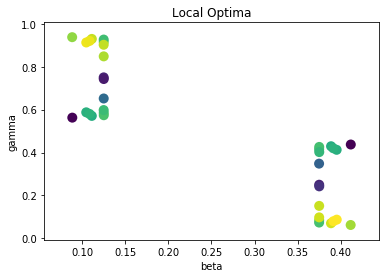

In [30]:
c = unw_centers
gamma = [float(c[i][1]) for i in range(len(c))]
beta = [float(c[i][0]) for i in range(len(c))]

#cm = plt.cm.get_cmap('Reds')

#plt.scatter(beta, gammafrom scipy.stats import gaussian_kde
from scipy.stats import gaussian_kde

fig = plt.figure(figsize = (6,4))
x =beta
y = gamma

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=100, edgecolor='')
plt.xlabel("beta")
plt.ylabel("gamma")
plt.title('Local Optima')
plt.show()

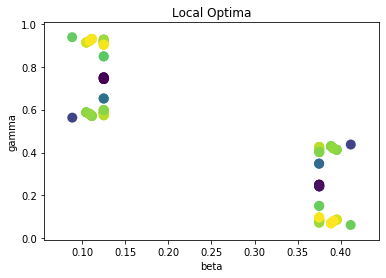

In [31]:
c = w_centers
gamma = [float(c[i][1]) for i in range(len(c))]
beta = [float(c[i][0]) for i in range(len(c))]

#cm = plt.cm.get_cmap('Reds')

#plt.scatter(beta, gammafrom scipy.stats import gaussian_kde
from scipy.stats import gaussian_kde

fig = plt.figure(figsize = (6,4))
x =beta
y = gamma

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=100, edgecolor='')
plt.xlabel("beta")
plt.ylabel("gamma")
plt.title('Local Optima')
plt.show()

In [34]:
c = unw_centers
gamma = [float(c[i][1]) for i in range(len(c))]
beta = [float(c[i][0]) for i in range(len(c))]

df = pd.DataFrame({'x': beta, 'y':gamma})
kmeans = KMeans(n_clusters = 1)
kmeans.fit(df)
labels = kmeans.predict(df)
sub_center = kmeans.cluster_centers_
sub_center

array([[0.24998481, 0.49956277]])

In [35]:
c = w_centers
gamma = [float(c[i][1]) for i in range(len(c))]
beta = [float(c[i][0]) for i in range(len(c))]

df = pd.DataFrame({'x': beta, 'y':gamma})
kmeans = KMeans(n_clusters = 1)
kmeans.fit(df)
labels = kmeans.predict(df)
sub_center = kmeans.cluster_centers_
sub_center

array([[0.24998342, 0.49962622]])

In [38]:
import math
import matplotlib.pyplot as plt
import numpy as np

pts_x = np.array(beta)
pts_y = np.array(gamma)


RESOLUTION = 56
LOCALITY = 2.0

dx = max(pts_x) - min(pts_x)
dy = max(pts_y) - min(pts_y)

delta = min(dx, dy) / RESOLUTION
nx = int(dx / delta)
ny = int(dy / delta)
radius = (1 / LOCALITY) * min(dx, dy)

grid_x = np.linspace(min(pts_x), max(pts_x), num=nx)
grid_y = np.linspace(min(pts_y), max(pts_y), num=ny)

x, y = np.meshgrid(grid_x, grid_y)

ValueError: x and y must be the same size

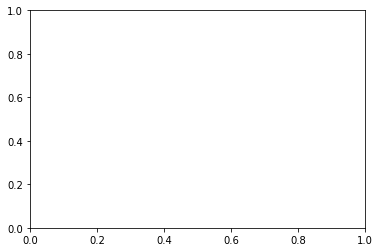

In [40]:
plt.scatter(grid_x, grid_y)

In [44]:
len(grid_x)

56

0.1119, 0.3483


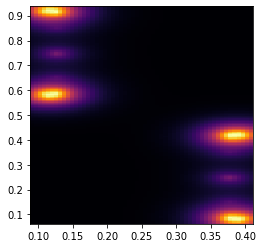

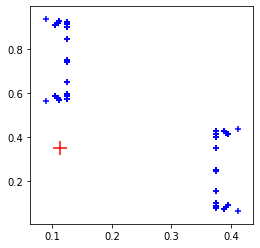

In [37]:
import math
import matplotlib.pyplot as plt
import numpy as np

pts_x = np.array(beta)
pts_y = np.array(gamma)


RESOLUTION = 56
LOCALITY = 2.0

dx = max(pts_x) - min(pts_x)
dy = max(pts_y) - min(pts_y)

delta = min(dx, dy) / RESOLUTION
nx = int(dx / delta)
ny = int(dy / delta)
radius = (1 / LOCALITY) * min(dx, dy)

grid_x = np.linspace(min(pts_x), max(pts_x), num=nx)
grid_y = np.linspace(min(pts_y), max(pts_y), num=ny)

x, y = np.meshgrid(grid_x, grid_y)


def gauss(x1, x2, y1, y2):
    """
    Apply a Gaussian kernel estimation (2-sigma) to distance between points.

    Effectively, this applies a Gaussian kernel with a fixed radius to one
    of the points and evaluates it at the value of the euclidean distance
    between the two points (x1, y1) and (x2, y2).
    The Gaussian is transformed to roughly (!) yield 1.0 for distance 0 and
    have the 2-sigma located at radius distance.
    """
    return (
        (1.0 / (2.0 * math.pi))
        * math.exp(
            -1 * (3.0 * math.sqrt((x1 - x2)**2 + (y1 - y2)**2) / radius))**2
        / 0.4)


def _kde(x, y):
    """
    Estimate the kernel density at a given position.

    Simply sums up all the Gaussian kernel values towards all points
    (pts_x, pts_y) from position (x, y).
    """
    return sum([
        gauss(x, px, y, py)
        # math.sqrt((x - px)**2 + (y - py)**2)
        for px, py in zip(pts_x, pts_y)
    ])


kde = np.vectorize(_kde)  # Let numpy care for applying our kde to a vector
z = kde(x, y)

xi, yi = np.where(z == np.amax(z))
max_x = grid_x[xi][0]
max_y = grid_y[yi][0]
print(f"{max_x:.4f}, {max_y:.4f}")


fig, ax = plt.subplots()
ax.pcolormesh(x, y, z, cmap='inferno', vmin=np.min(z), vmax=np.max(z))
fig.set_size_inches(4, 4)
fig.savefig('density.png', bbox_inches='tight')

fig, ax = plt.subplots()
ax.scatter(pts_x, pts_y, marker='+', color='blue')
ax.scatter(grid_x[xi], grid_y[yi], marker='+', color='red', s=200)
fig.set_size_inches(4, 4)
fig.savefig('marked.png', bbox_inches='tight')

In [49]:
#Finding clusters from the above overlapping local optima plot

overlapping_centers=[]

gamma = [float(centers[i][1]) for i in range(len(centers))]
beta = [float(centers[i][0]) for i in range(len(centers))]
df = pd.DataFrame({'x': beta, 'y':gamma})
kmeans = KMeans(n_clusters = 8)
kmeans.fit(df)
labels = kmeans.predict(df)
sub_centers = kmeans.cluster_centers_
for row in sub_centers:
    overlapping_centers.append(row)

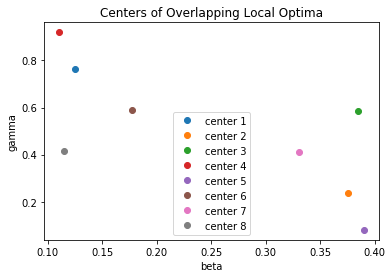

In [50]:
#plotting 
x = [i[0] for i in overlapping_centers]
y = [i[1] for i in overlapping_centers]
for i in range(len(x)):
    plt.plot(x[i],y[i], marker = "o", linestyle = "", label = "center " + str(i+1))
plt.xlabel("beta")
plt.ylabel("gamma")
plt.title('Centers of Overlapping Local Optima')
plt.legend()
plt.show()

In [51]:
overlapping_centers

[array([0.12499829, 0.7655852 ]),
 array([0.37502655, 0.23578019]),
 array([0.38496972, 0.5840616 ]),
 array([0.11061734, 0.91970973]),
 array([0.38978625, 0.08037869]),
 array([0.17728885, 0.58903538]),
 array([0.33075605, 0.41290091]),
 array([0.11503372, 0.41595895])]

In [52]:
overlapping_centers_ratios = []

for center in overlapping_centers:
    center_ratios = []
    for g_ind in range(len(g_list)):
        
        #loss = get_edge_contribution(graph = g_all[g_ind], edge = (0,1), gamma = [center[1]], beta = [center[0]])
        #notice index of gamma and beta are reversed because thats how its plotted above
        
        e = QAOA_energy(g_list[g_ind], gamma = [center[1]],beta = [center[0]])
        #print(e)
        
        max_e = g_data[g_ind][2]
        #print(max_e)
        ratio = e/max_e
        
        center_ratios.append(ratio)
    overlapping_centers_ratios.append(center_ratios)

In [53]:
for r in range(len(overlapping_centers_ratios)):
    for c in range(len(overlapping_centers_ratios[r])):
        overlapping_centers_ratios[r][c] = float(overlapping_centers_ratios[r][c] )

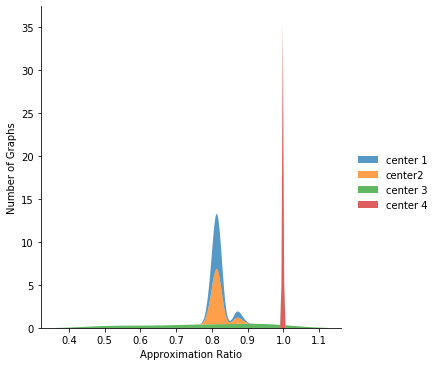

In [67]:
# importing iris dataset from the library
df = pd.DataFrame({'center 1': overlapping_centers_ratios[0],
                   'center2': overlapping_centers_ratios[1],
                   'center 3': overlapping_centers_ratios[2] ,
                  'center 4': overlapping_centers_ratios[3],
#                    'center 5': overlapping_centers_ratios[4],
#                    'center 6': overlapping_centers_ratios[5] ,
#                   'center 7': overlapping_centers_ratios[6],
#                    'center 8': overlapping_centers_ratios[7],
                 })
  
# plotting histogram and density plot for 
# sepal width using distplot() by setting color
sns.displot(df,kind="kde", multiple="stack", linewidth=0)#, #hist_kws={"edgecolor": 'white'})



plt.xlabel("Approximation Ratio")
plt.ylabel("Number of Graphs")
plt.show()

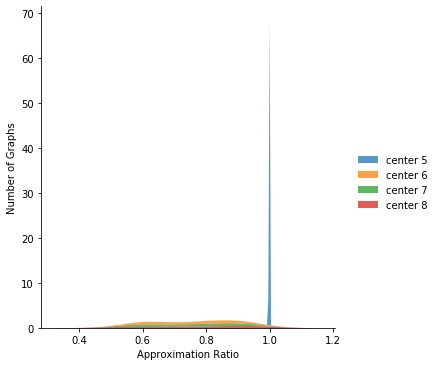

In [68]:
# importing iris dataset from the library
df = pd.DataFrame({
#     'center 1': overlapping_centers_ratios[0],
#                    'center2': overlapping_centers_ratios[1],
#                    'center 3': overlapping_centers_ratios[2] ,
#                   'center 4': overlapping_centers_ratios[3],
                   'center 5': overlapping_centers_ratios[4],
                   'center 6': overlapping_centers_ratios[5] ,
                  'center 7': overlapping_centers_ratios[6],
                   'center 8': overlapping_centers_ratios[7]
                 })
  
# plotting histogram and density plot for 
# sepal width using distplot() by setting color
sns.displot(df,kind="kde", multiple="stack", linewidth=0)#, #hist_kws={"edgecolor": 'white'})



plt.xlabel("Approximation Ratio")
plt.ylabel("Number of Graphs")
plt.show()

In [55]:
overlapping_centers_ratios

[[0.8280617172797237,
  0.8198345100508734,
  0.8644189567874347,
  0.8742488024617848,
  0.8192875071641251,
  0.8195336922307833,
  0.8062315197970807,
  0.810952516519152,
  0.8135480154232744,
  0.8191847205130309,
  0.7909251912717788,
  0.793921857043523,
  0.8042472978311422,
  0.8111485310072,
  0.8288848985284057,
  0.8229963379942765,
  0.818498423452091,
  0.812790952763703,
  0.8102634645713147,
  0.7988160834699378,
  0.8043088734857442,
  0.799019960982091,
  0.8264857689553786,
  0.8169007325077827,
  0.8235728264266825,
  0.8746204535548718,
  0.866506024807159,
  0.8873582012617242,
  0.8083450622836573,
  0.8241798971832134,
  0.8047291700960364,
  0.8222130657159074,
  0.8234503107692657,
  0.823774486055166,
  0.8079689188270864,
  0.8123041624947542,
  0.8095069435777875,
  0.8202501774178987,
  0.8285489728971469,
  0.8061850213600293,
  0.8138205301990367,
  0.8133813480844002,
  0.8161814009035646,
  0.7881227358480576,
  0.7951051437793183,
  0.8059564857274333

In [69]:
iterr = 0
for i in overlapping_centers_ratios[4]:
    if i>0.98:
        iterr+=1
print(iterr)

55
